# Practice Assignment

In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
X,y = load_wine(return_X_y=True, as_frame=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [5]:
clf = DecisionTreeClassifier(random_state=1)

In [6]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [7]:
clf.score(X_test,y_test)

0.9444444444444444

In [8]:
clf.score(X_train,y_train)

1.0

In [16]:
clf.get_depth()

6

In [17]:
clf2 = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=3,min_samples_split=4,min_impurity_decrease=0.1,random_state=1)

In [18]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3,
                       min_impurity_decrease=0.1, min_samples_split=4,
                       random_state=1, splitter='random')

In [20]:
clf2.score(X_test,y_test)

0.7777777777777778

In [21]:
clf2.score(X_train,y_train)

0.8145161290322581

In [22]:
clf2.get_depth()

3

In [25]:
X.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [24]:
from sklearn import tree

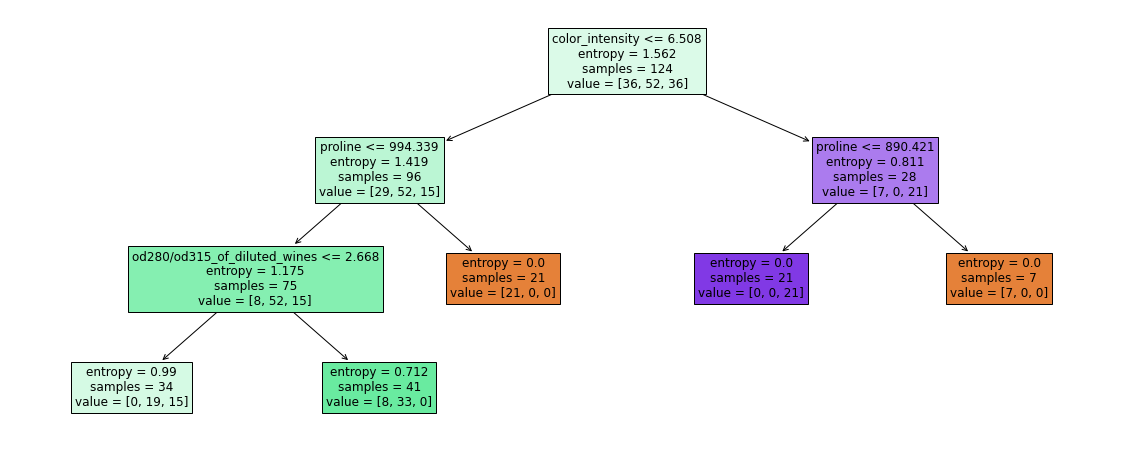

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
a=tree.plot_tree(clf2,
                 feature_names=X.columns,
                 filled=True,
                 fontsize=12)

# Graded Assignment

##Q1-3
Load sklearn's Wine dataset.

Split the dataset into train and test set with 70:30 ratio with \\
> `random_state=1`. 

Use DecisionTreeClassifier with 

>random_state = 1

Hyperparameter tuning to be done over the following parameters:

-- Use criterion as 'entropy' or 'gini'

-- Use splitter as 'random' or 'best'

-- Use minimum number of samples per leaf as [2,4,6,8,10]

-- Use maximum depth as [3,4,5,6]

-- Use cross validation = 4

-- Train the 'model'

Q-1: Find the score on testing set

In [27]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid=[{'criterion':['gini','entropy'],
             'splitter':['random','best'],
             'max_depth':[3,4,5,6],
             'min_samples_leaf':[2,4,6,8,10]}]

In [40]:
clf3 = DecisionTreeClassifier(random_state=1)

In [41]:
clf_grid = GridSearchCV(clf3,
                        param_grid,
                        cv=4,
                        scoring='f1_macro')

In [42]:
clf_grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=1),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [3, 4, 5, 6],
                          'min_samples_leaf': [2, 4, 6, 8, 10],
                          'splitter': ['random', 'best']}],
             scoring='f1_macro')

In [43]:
clf_grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'splitter': 'best'}

In [44]:
clf_grid.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=1)

In [45]:
clf_grid.best_estimator_.score(X_test,y_test)

0.9074074074074074

In [46]:
clf_grid.get_params()

{'cv': 4,
 'error_score': nan,
 'estimator': DecisionTreeClassifier(random_state=1),
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': 1,
 'estimator__splitter': 'best',
 'n_jobs': None,
 'param_grid': [{'criterion': ['gini', 'entropy'],
   'max_depth': [3, 4, 5, 6],
   'min_samples_leaf': [2, 4, 6, 8, 10],
   'splitter': ['random', 'best']}],
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': 'f1_macro',
 'verbose': 0}

##Q4-7
Load sklearn's Diabetes dataset.

Split the dataset into train and test set with 70:30 ratio with 

>random_state = 1
.

Use DecisionTreeRegressor with 

> random_state = 1.

 and the following parameters:

-- Use criterion as 'squared_error'

-- Use splitter as 'random'

-- Use max_leaf_nodes= 10,

-- Train the 'model' and compute the 'score' on training data and test data

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes

In [51]:
X,y=load_diabetes(return_X_y=True, as_frame=True)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [52]:
dt_reg = DecisionTreeRegressor(random_state=1, criterion='squared_error',splitter='random', max_leaf_nodes=10)

In [53]:
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=1, splitter='random')

In [54]:
dt_reg.score(X_test,y_test)

0.218771375137222

In [55]:
dt_reg.score(X_train,y_train)

0.5032060624566737

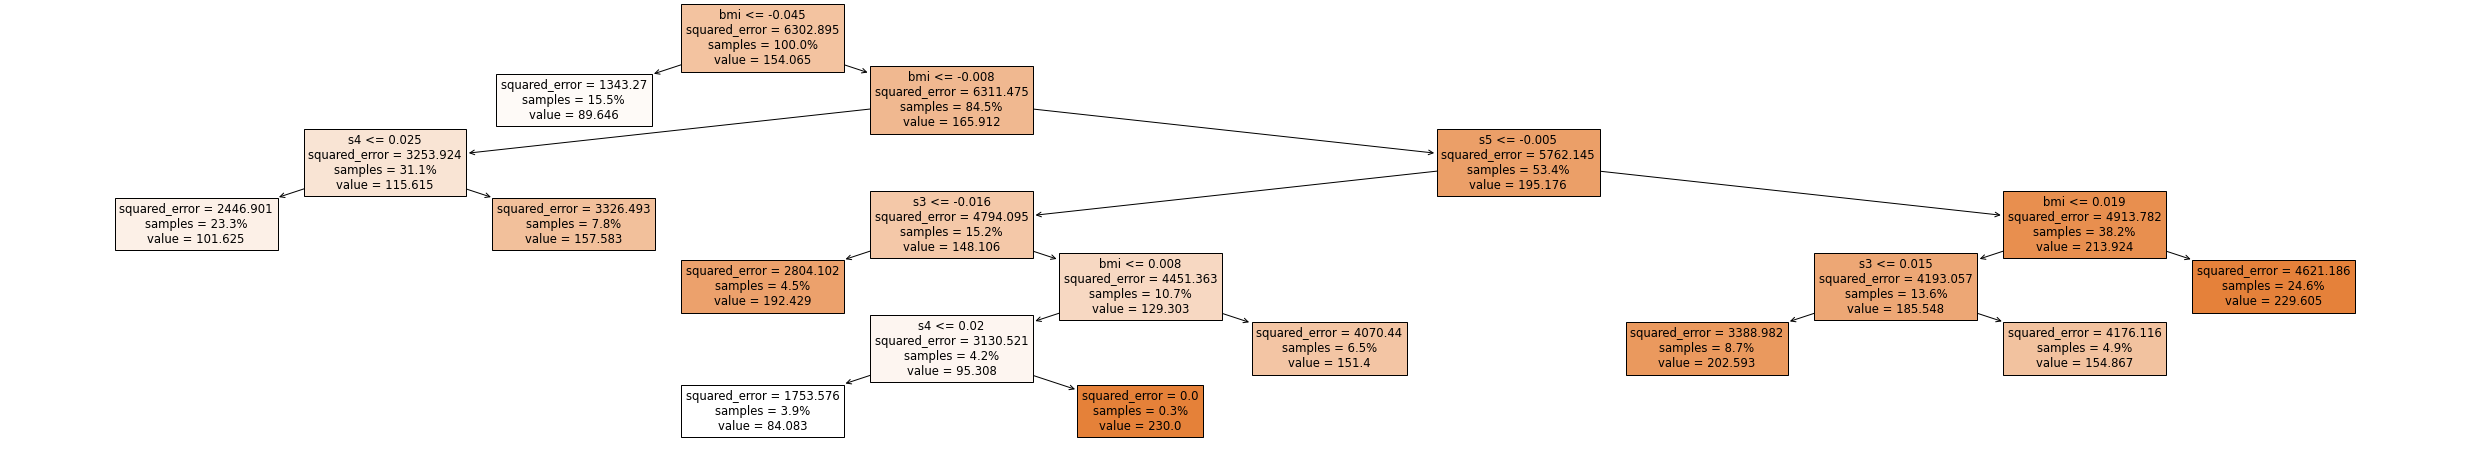

In [58]:
plt.figure(figsize=(44,8),facecolor='w')
a = tree.plot_tree(dt_reg,
                   feature_names=X.columns,
                   filled=True,
                   proportion=True)
plt.show()

##Q8-10
Load the diabetes dataset from sklearn.

Split the dataset into train and test set with 70:30 ratio with 

>random_state = 1
.

Use DecisionTreeRegressor with 

>max_depth = 4 

 and 
>random_state = 1. 

 and other values being default.

Perform Hyperparameter tuning over the following parameters:

-- Use criterion as ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']

-- Use splitter as 'random' or 'best'

-- Use max number of features as ['auto','sqrt', 'log2'],

-- Use cost complexity pruning parameter as [0.001,0.01,0.02,0.05]

-- Use cross validation = 4

In [59]:
dt_reg1=DecisionTreeRegressor(random_state=1,max_depth=4)

In [60]:
param_grid = [{'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
               'splitter':['random','best'],
               'max_features':['auto','sqrt', 'log2'],
               'ccp_alpha':[0.001,0.01,0.02,0.05]}]
cv=4

In [66]:
dt_reg_cv = GridSearchCV(dt_reg1,
                        param_grid,
                        cv=cv,
                        )
dt_reg_cv.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(max_depth=4, random_state=1),
             param_grid=[{'ccp_alpha': [0.001, 0.01, 0.02, 0.05],
                          'criterion': ['squared_error', 'friedman_mse',
                                        'absolute_error', 'poisson'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'splitter': ['random', 'best']}])

In [67]:
dt_reg_cv.best_params_

{'ccp_alpha': 0.02,
 'criterion': 'absolute_error',
 'max_features': 'auto',
 'splitter': 'best'}

In [68]:
dt_reg_cv.best_estimator_.score(X_test,y_test)

0.10873445074064803

In [65]:
dt_reg_cv.score(X_test,y_test)

-52.81000931284124